# Scope results over custom space domains {#ref_results_over_space}

The `Result <ansys.dpf.core.results.Result>`{.interpreted-text
role="class"} class, which are instances created by the
`Model <ansys.dpf.core.model.Model>`{.interpreted-text role="class"},
give access to helpers for requesting results on specific mesh and time
scopings. With these helpers, working on a spatial subset of the model
is straightforward. In this example, different ways to choose the
spatial subset to evaluate a result are exposed

Import necessary modules:


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

Create a model object to establish a connection with an example result
file:


In [2]:
model = dpf.Model(examples.download_all_kinds_of_complexity())
print(model)

DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  element_nodal_forces: ElementalNodal Element nodal Forces
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  thermal_strain: ElementalNodal Thermal Strains
     -  thermal_strains_eqv: ElementalNodal Thermal Strains eqv
     -  swelling_strains: ElementalNodal Swelling Strains
     -  structural_temperature: ElementalNodal Temperatur

# Choose specific nodes

If some nodes or elements are specifically of interest, a nodal
`mesh_scoping` can be connected.


In [3]:
nodes_scoping = dpf.mesh_scoping_factory.nodal_scoping(range(400, 500))
print(nodes_scoping)

DPF  Scoping: 
  with Nodal location and 100 entities



or


In [4]:
nodes_scoping = dpf.Scoping(ids=range(400, 500), location=dpf.locations.nodal)
print(nodes_scoping)

DPF  Scoping: 
  with Nodal location and 100 entities



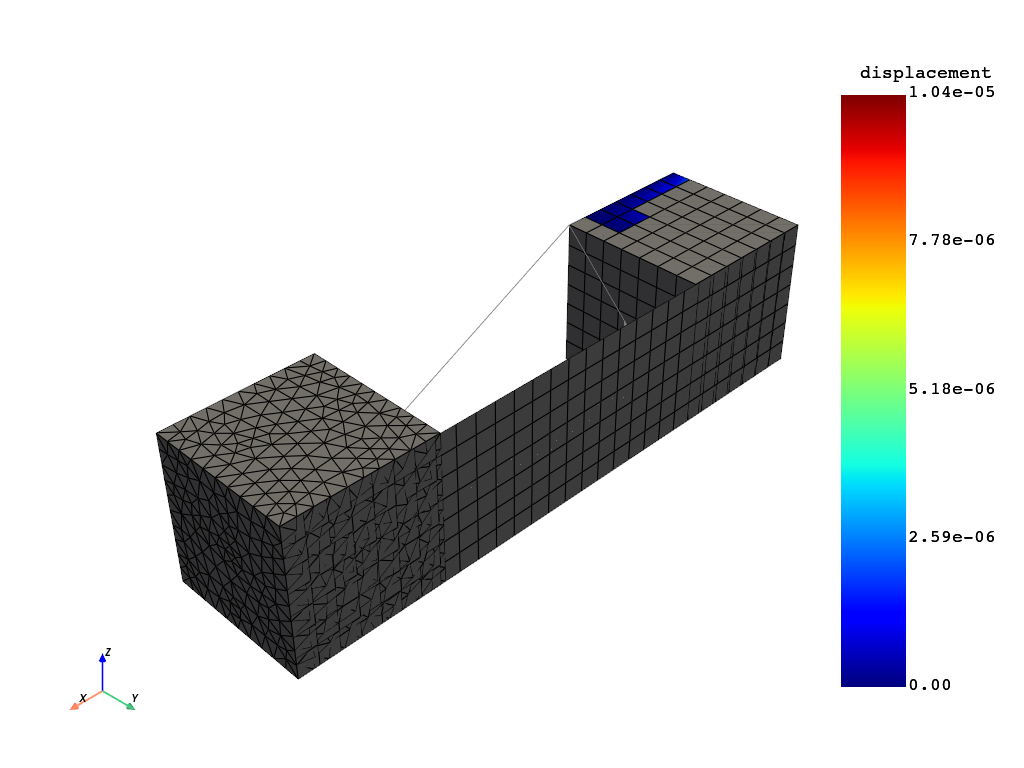

In [5]:
disp = model.results.displacement.on_mesh_scoping(nodes_scoping).eval()

model.metadata.meshed_region.plot(disp)

Equivalent to:


In [6]:
disp_op = model.results.displacement()
disp_op.inputs.mesh_scoping(nodes_scoping)
disp = disp_op.outputs.fields_container()

Equivalent to:


In [7]:
disp = model.results.displacement(mesh_scoping=nodes_scoping).eval()

# Choose specific elements

If some elements are specifically of interest, an elemental
`mesh_scoping` can be connected.


DPF  Scoping: 
  with Elemental location and 4500 entities

DPF  Scoping: 
  with Elemental location and 4500 entities



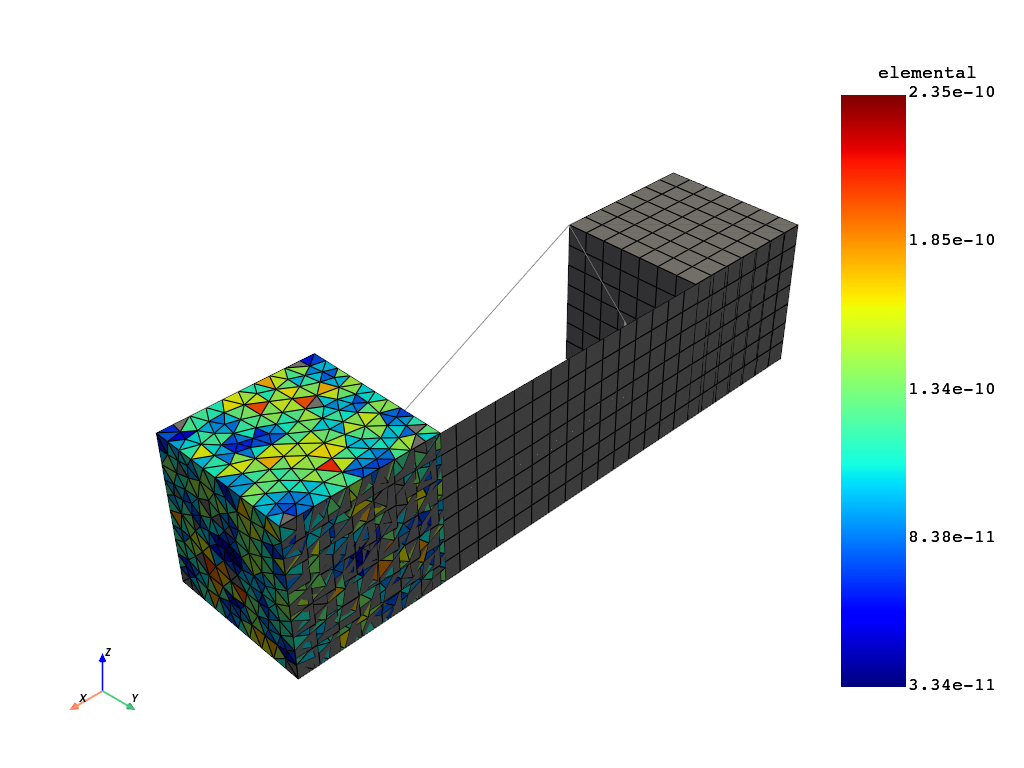

In [8]:
elements_scoping = dpf.mesh_scoping_factory.elemental_scoping(range(500, 5000))
print(elements_scoping)

# or
elements_scoping = dpf.Scoping(ids=range(500, 5000), location=dpf.locations.elemental)
print(elements_scoping)

volume = model.results.elemental_volume.on_mesh_scoping(elements_scoping).eval()

model.metadata.meshed_region.plot(volume)

Equivalent to:


In [9]:
volume_op = model.results.elemental_volume()
volume_op.inputs.mesh_scoping(elements_scoping)
volume = volume_op.outputs.fields_container()

Equivalent to:


In [10]:
volume = model.results.elemental_volume(mesh_scoping=elements_scoping).eval()

# Choose specific named selections

Named selections (also known as components) can be selected to create a
spatial domain for a result. A `mesh_scoping` can be created with a
named selection. To know the available named selections in the result
file, use:


In [11]:
print(model.metadata.available_named_selections)

['_CM82', '_CM86UX_XP', '_DISPNONZEROUX', '_DISPZEROUZ', '_ELMISC', '_FIXEDSU']


Get the `mesh_scoping` of a named selection:


In [12]:
mesh_scoping = model.metadata.named_selection("_CM82")
print(mesh_scoping)

DPF  Scoping: 
  with Elemental location and 8709 entities



Connect this `mesh_scoping` to the result provider


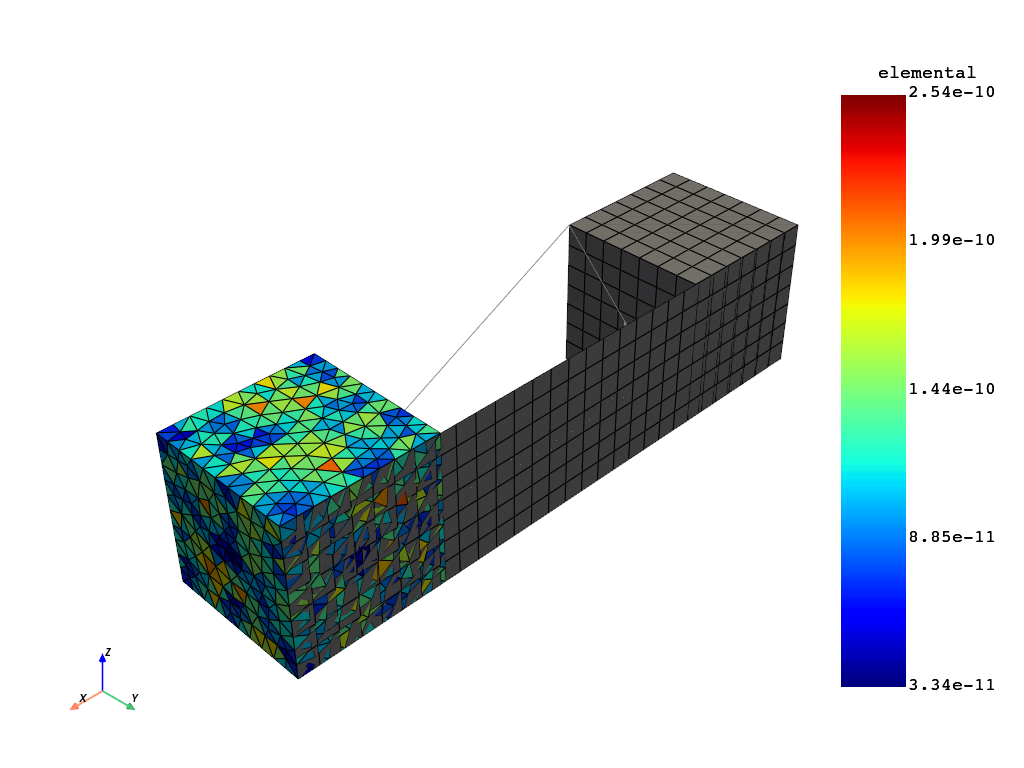

In [13]:
volume = model.results.elemental_volume(mesh_scoping=mesh_scoping).eval()
model.metadata.meshed_region.plot(volume)

Equivalent to:


In [14]:
volume = model.results.elemental_volume.on_named_selection("_CM82")

Equivalent to:


In [15]:
ns_provider = dpf.operators.scoping.on_named_selection(
    requested_location=dpf.locations.elemental,
    named_selection_name="_CM82",
    data_sources=model,
)
volume = model.results.elemental_volume(mesh_scoping=ns_provider).eval()

# Split results depending on spatial properties

For many applications, it can be useful to request results on different
subsets of the model. The `ScopingsContainer` entity contains different
`Scopings` and can be connected to any result provider to get results
split with the same partition as the input `ScopingsContainer`. For
example, some application require to get results split by body, by
material, by element types. It might also be necessary to get results by
element shape types, such as shell, solid, or beam, to average data
properly. Customers might also require split by entirely custom spatial
domains.


Split results by element shapes


DPF stress(s)Fields Container
  with 4 field(s)
  defined on labels: elshape time 

  with:
  - field 0 {elshape:  0, time:  1} with Nodal location, 6 components and 240 entities.
  - field 1 {elshape:  1, time:  1} with Nodal location, 6 components and 14826 entities.
  - field 2 {elshape:  2, time:  1} with Nodal location, 6 components and 0 entities.
  - field 3 {elshape:  3, time:  1} with Nodal location, 6 components and 0 entities.



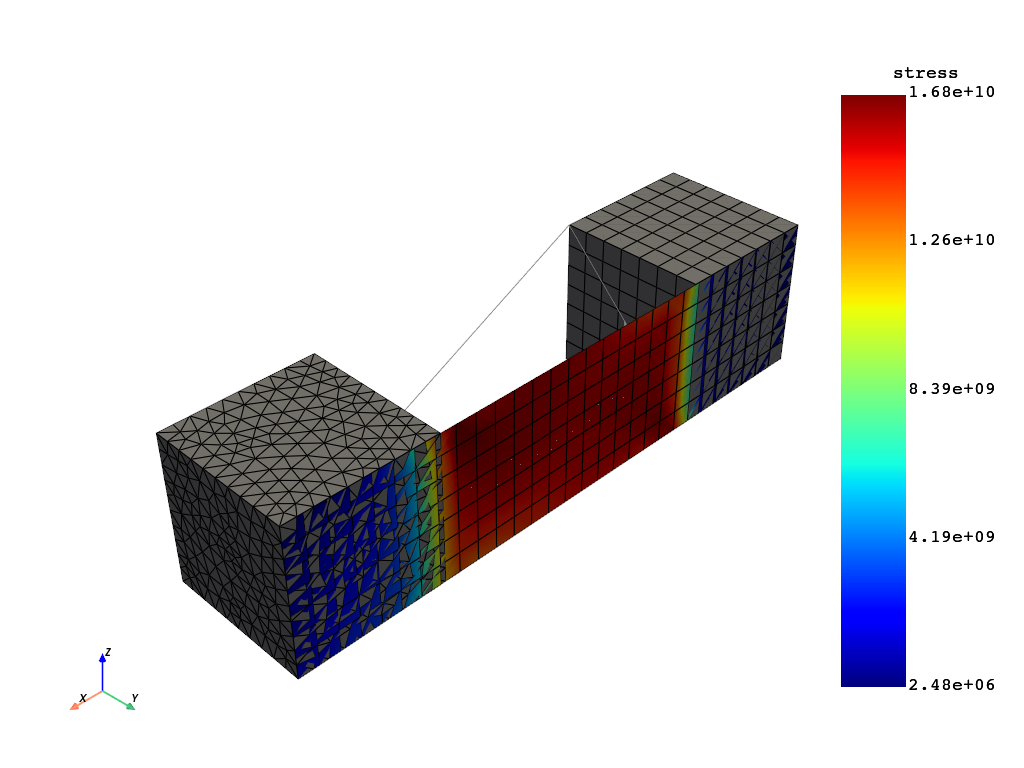

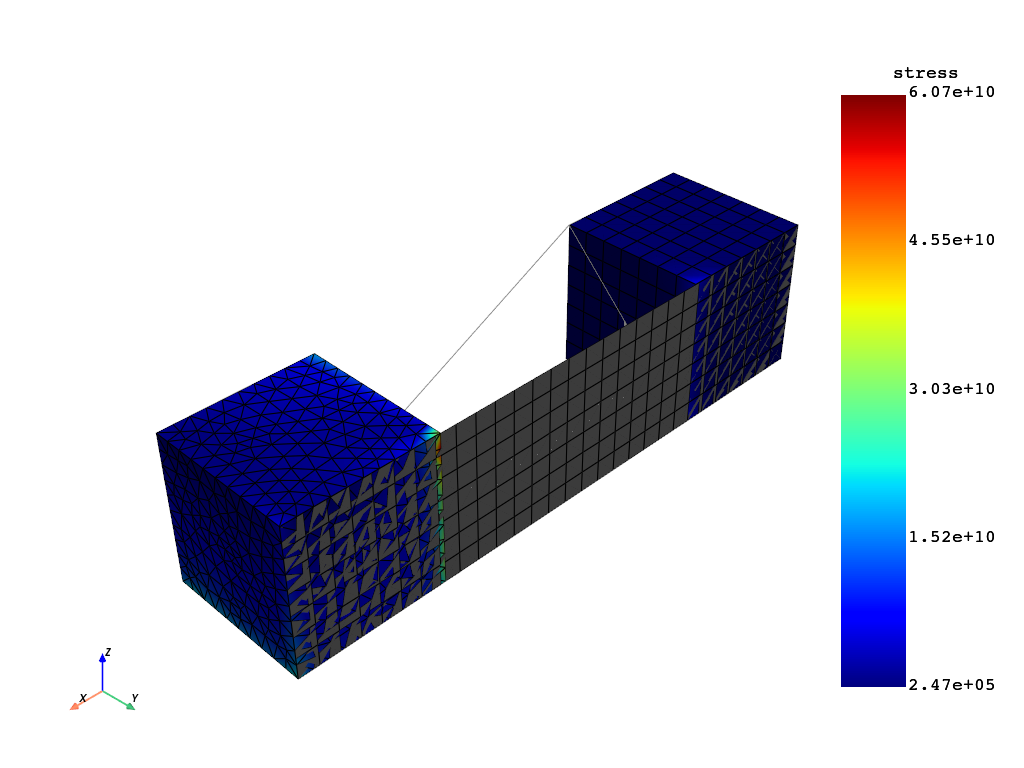

In [16]:
stress = model.results.stress.split_by_shape.on_location(dpf.locations.nodal).eval()
print(stress)

shell_stresses = stress.shell_fields()
model.metadata.meshed_region.plot(shell_stresses[0])

solid_stresses = stress.solid_fields()
model.metadata.meshed_region.plot(solid_stresses[0])

Split results by bodies


DPF stress(s)Fields Container
  with 3 field(s)
  defined on labels: elshape mat time 

  with:
  - field 0 {elshape:  2, mat:  1, time:  1} with Nodal location, 6 components and 1856 entities.
  - field 1 {elshape:  1, mat:  1, time:  1} with Nodal location, 6 components and 240 entities.
  - field 2 {elshape:  2, mat:  2, time:  1} with Nodal location, 6 components and 12970 entities.



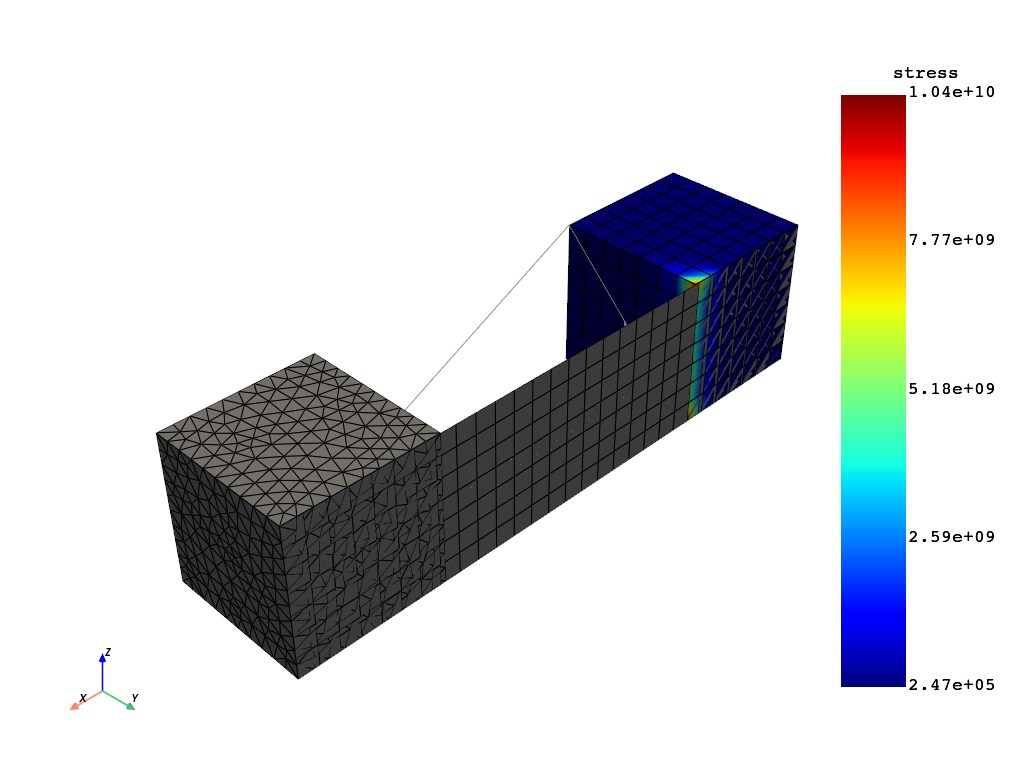

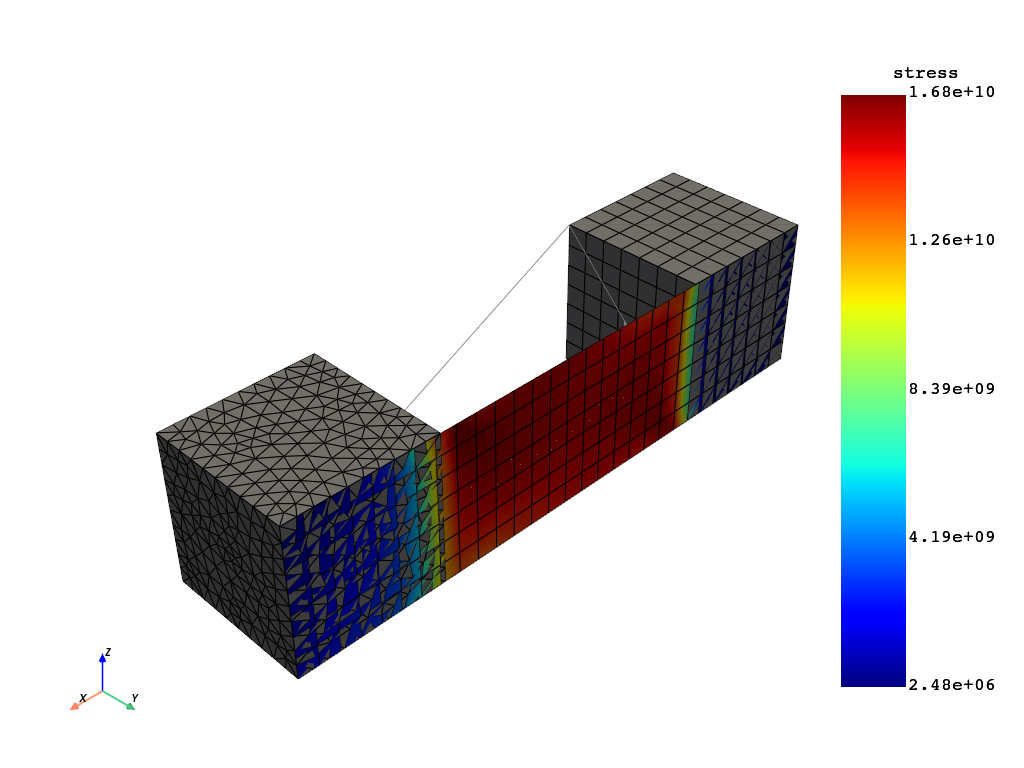

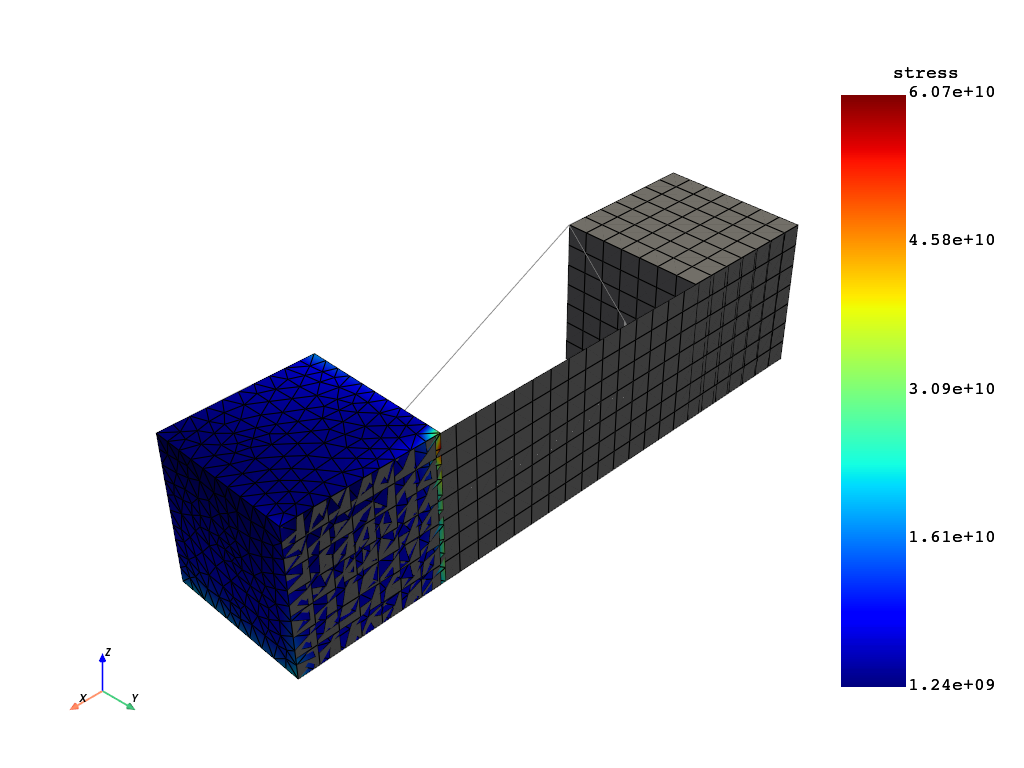

In [17]:
stress = model.results.stress.split_by_body.on_location(dpf.locations.nodal).eval()
print(stress)

for body_id in stress.get_mat_scoping().ids:
    fields = stress.get_fields_by_mat_id(body_id)
    for field in fields:
        if field.elementary_data_count > 0:
            model.metadata.meshed_region.plot(field)

Create a custom spatial split


In [18]:
scopings_container = dpf.ScopingsContainer()
scopings_container.add_label("custom_split")
scopings_container.add_scoping(
    {"custom_split": 1},
    dpf.Scoping(ids=range(100, 500), location=dpf.locations.elemental),
)
scopings_container.add_scoping(
    {"custom_split": 2},
    dpf.Scoping(ids=range(500, 5000), location=dpf.locations.elemental),
)

DPF stress(s)Fields Container
  with 2 field(s)
  defined on labels: custom_split time 

  with:
  - field 0 {custom_split:  1, time:  1} with Elemental location, 6 components and 400 entities.
  - field 1 {custom_split:  2, time:  1} with Elemental location, 6 components and 4500 entities.



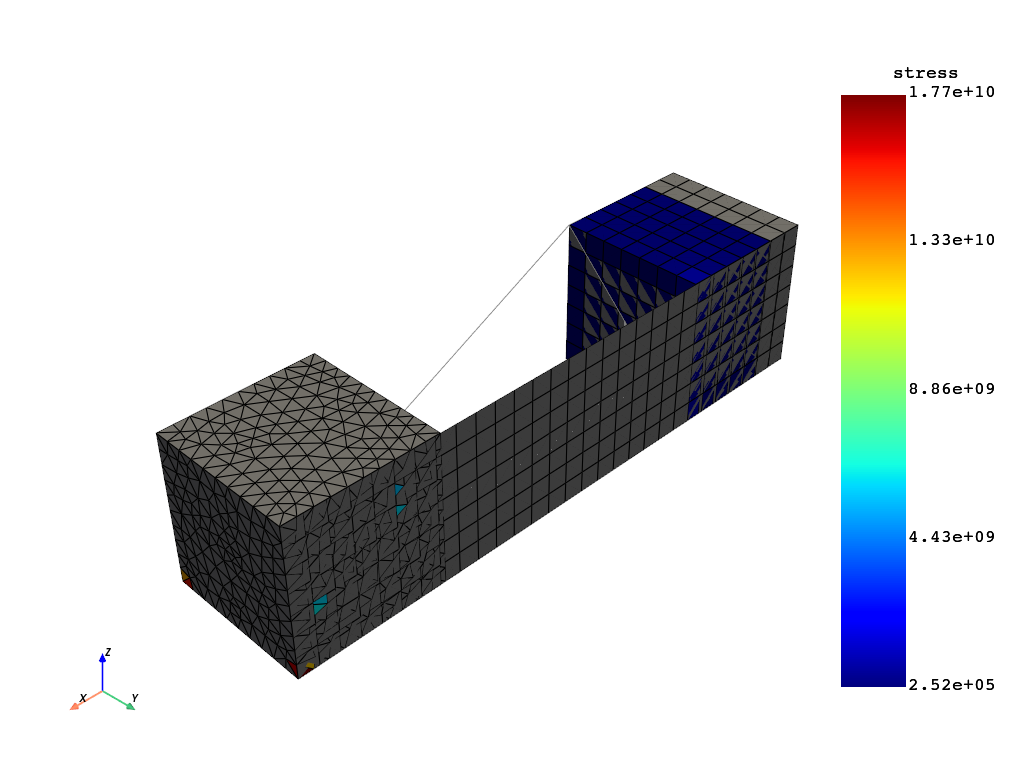

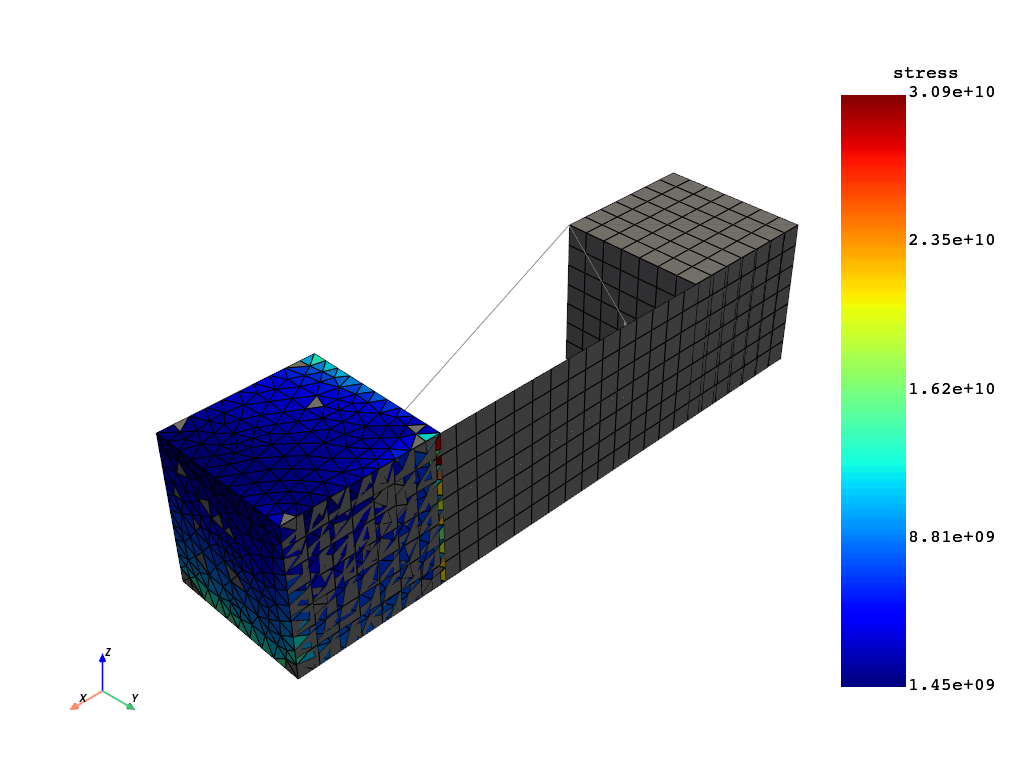

In [19]:
elemental_stress = model.results.stress.on_location(dpf.locations.elemental)(
    mesh_scoping=scopings_container
).eval()
print(elemental_stress)

for field in elemental_stress:
    model.metadata.meshed_region.plot(field)